## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [2]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

In [3]:
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif,chi2

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
from sklearn.svm import SVC

In [17]:
from sklearn.metrics import roc_curve,auc

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
from sklearn.naive_bayes import GaussianNB

In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## EDA

### Preprocessing

#### Steps Taken:
1. **Loading the Dataset:**
   - The breast cancer dataset was loaded using `sklearn.datasets.load_breast_cancer`.

2. **Checking for Missing Values:**
   - After inspecting the dataset, no missing values were found. Hence, no imputation was required.

3. **Feature Scaling:**
   - The dataset was scaled using `StandardScaler` to ensure that all features are on the same scale. This is critical for algorithms like SVM, k-NN, and Logistic Regression, which are sensitive to the magnitude of features.
   - Scaling was performed using the `fit_transform` method on the training set and `transform` on the test set.

#### Justification for Preprocessing:
- Feature scaling ensures that the models treat all features equally, avoiding bias towards features with larger magnitudes.
- Preprocessing ensures fair comparisons among models that have different sensitivities to raw feature values.

In [25]:
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns = data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [29]:
df.duplicated().sum()

0

In [31]:
df.isnull().sum().sum()

0

In [33]:
df.shape

(569, 30)

In [35]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Identify and Handle Outliers

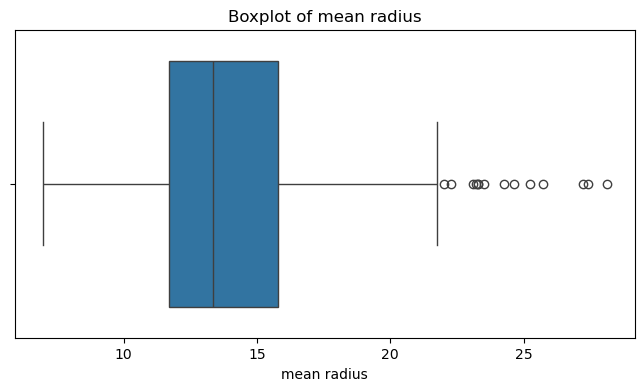

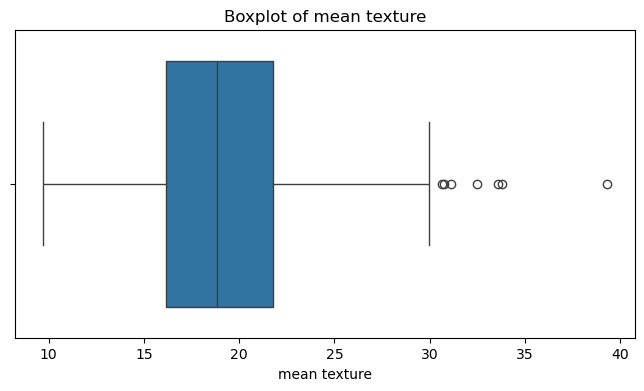

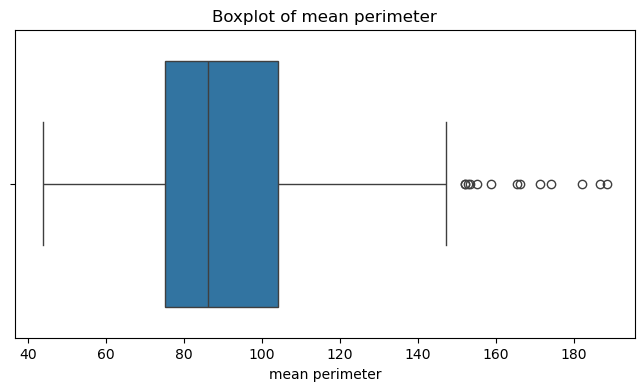

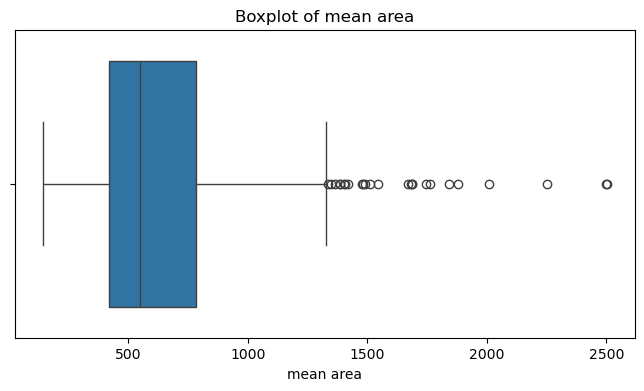

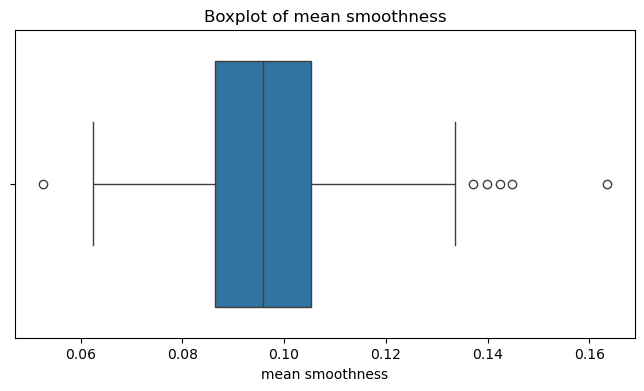

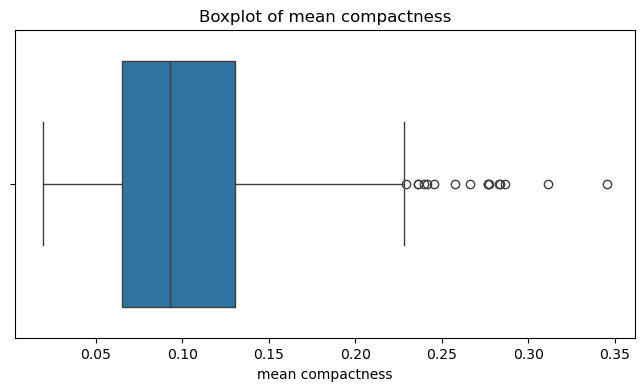

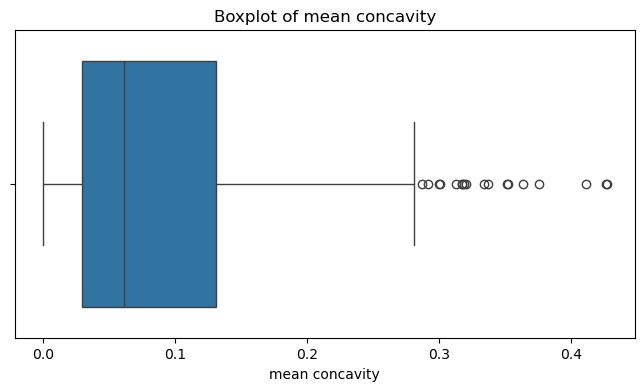

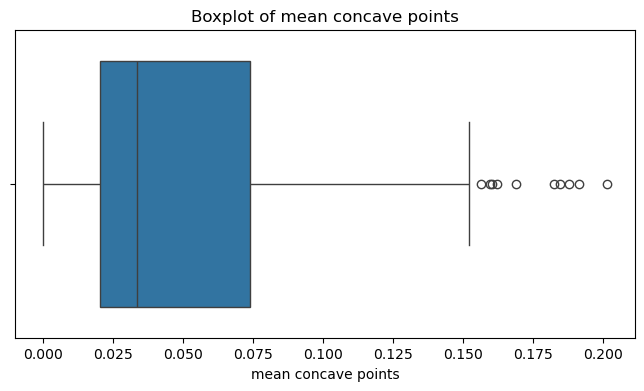

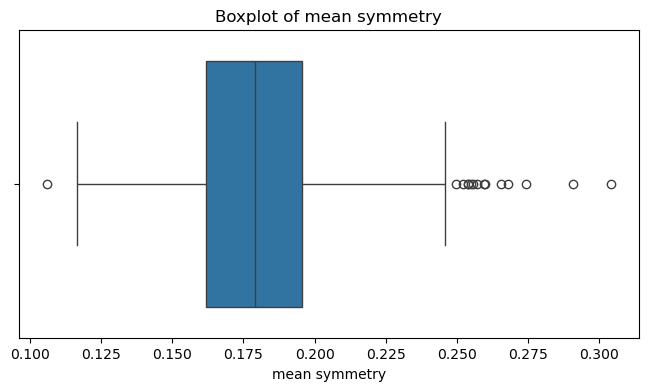

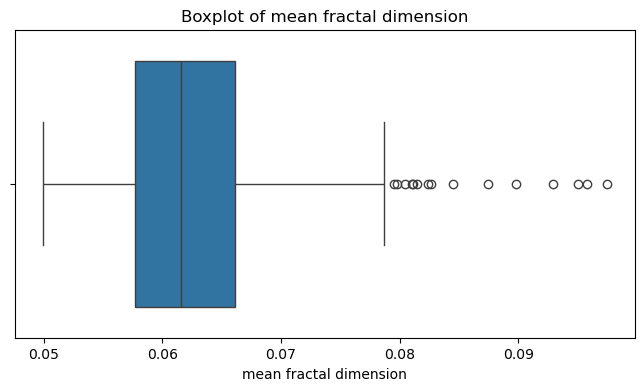

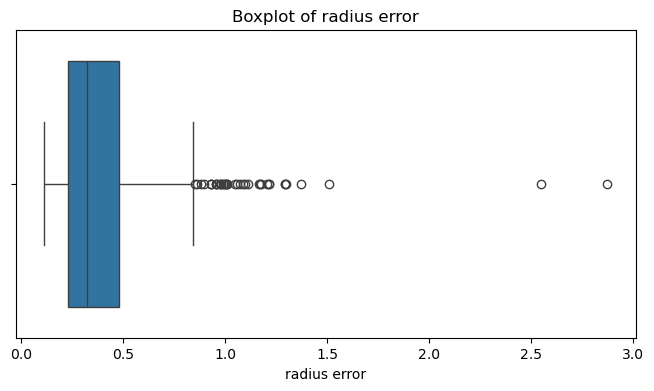

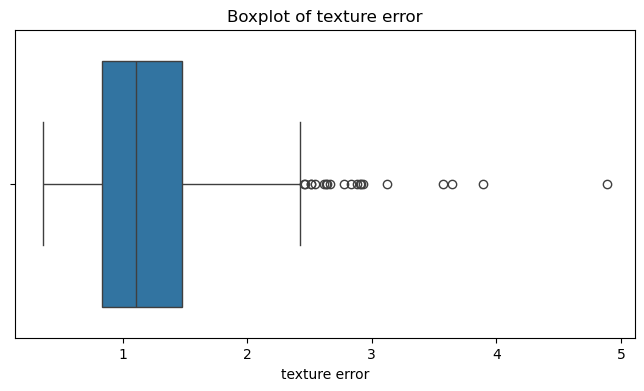

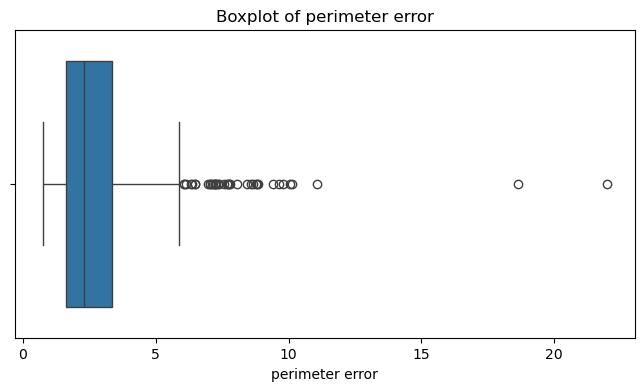

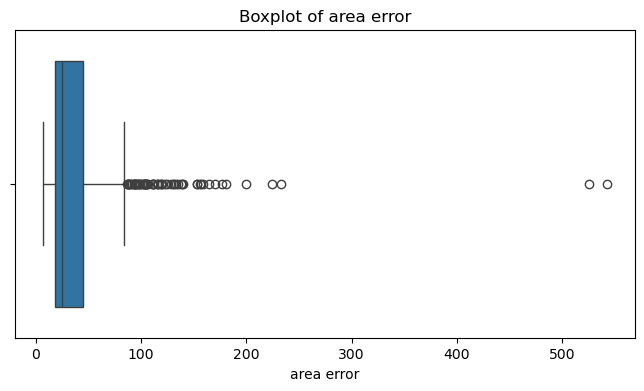

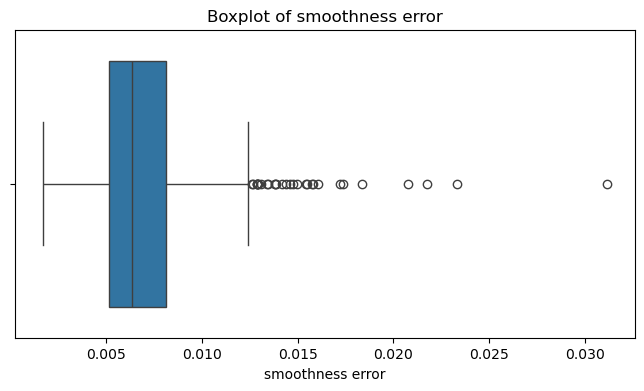

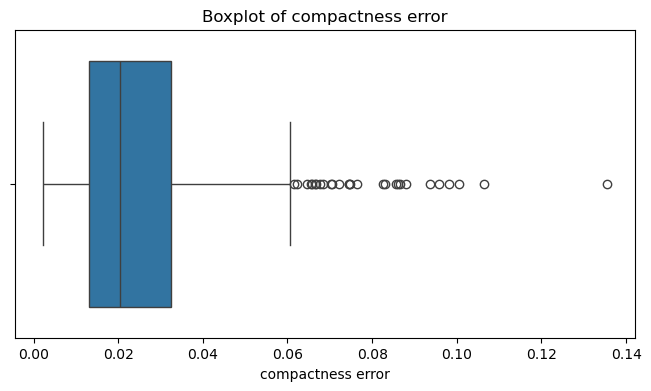

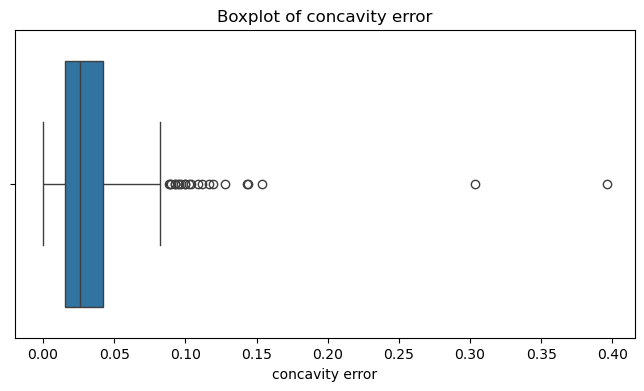

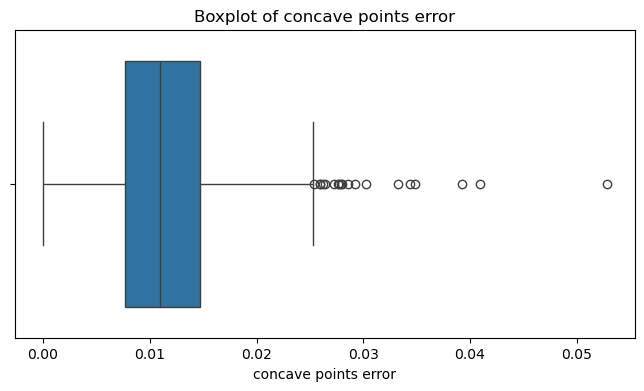

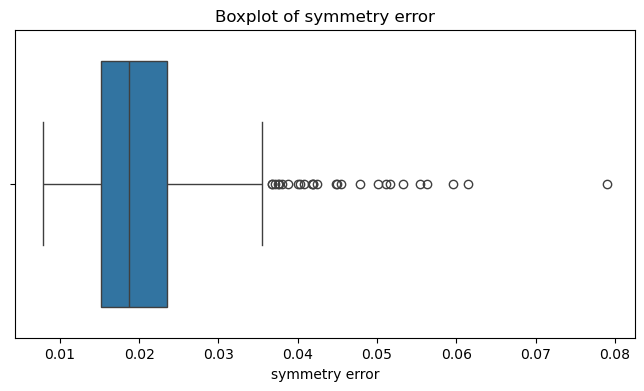

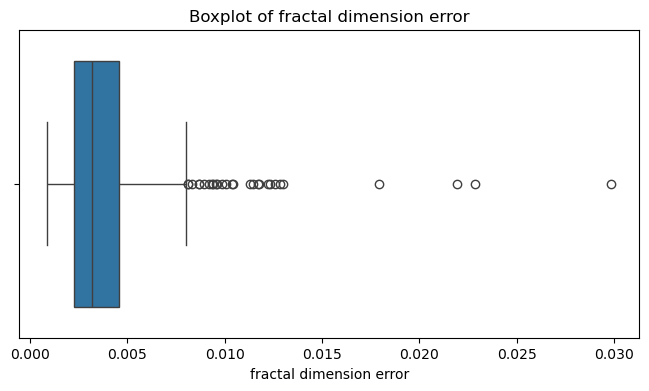

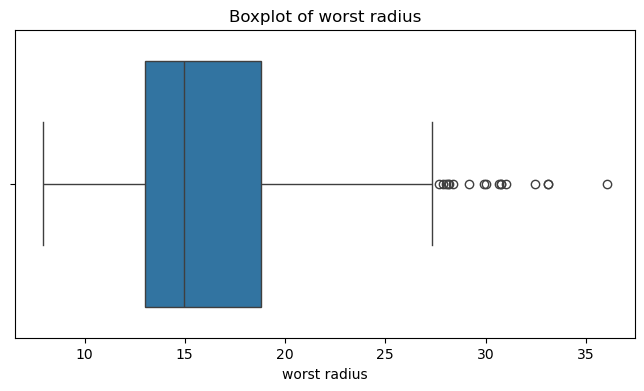

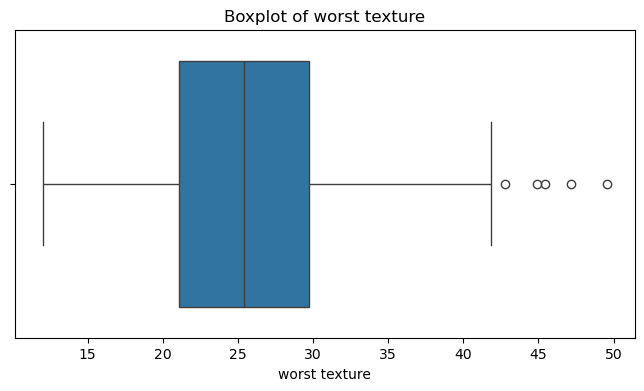

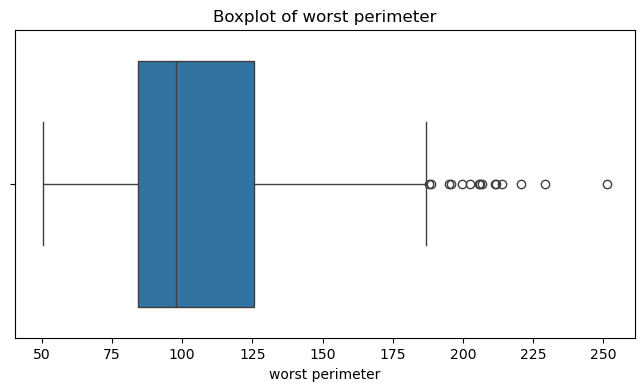

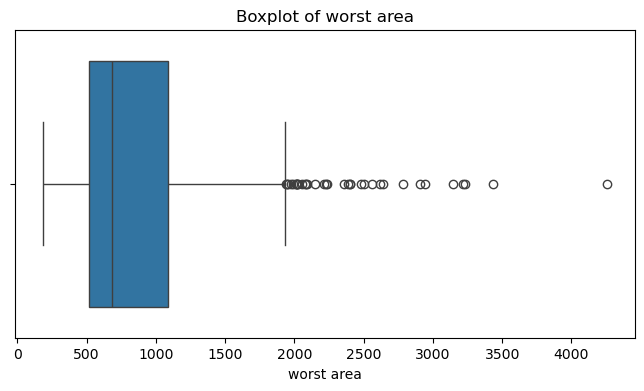

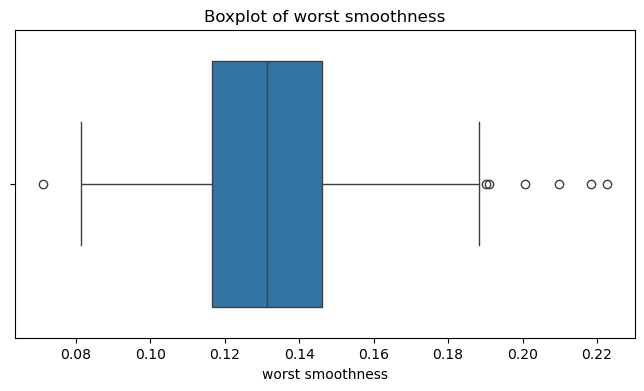

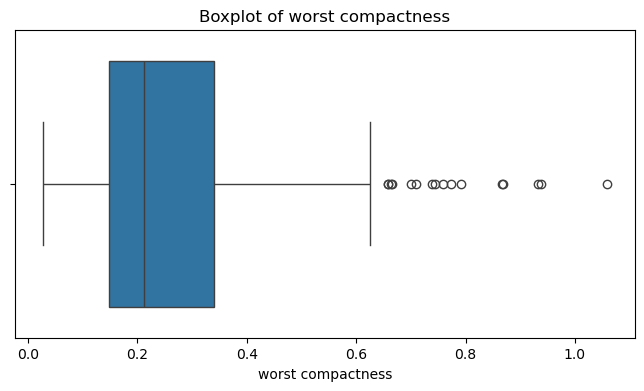

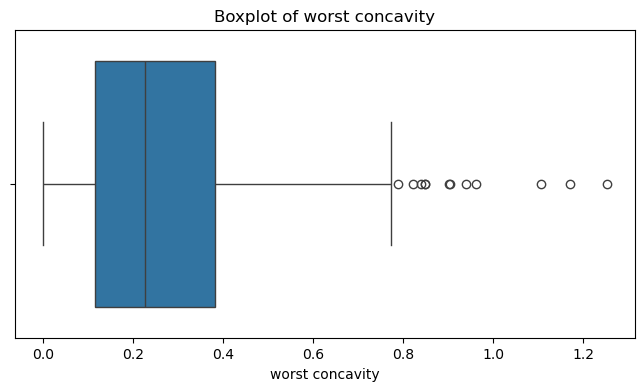

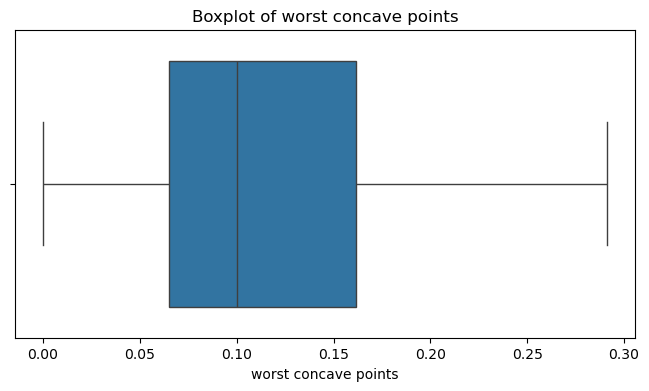

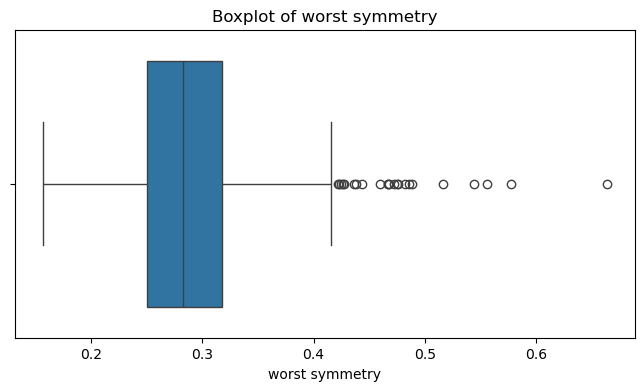

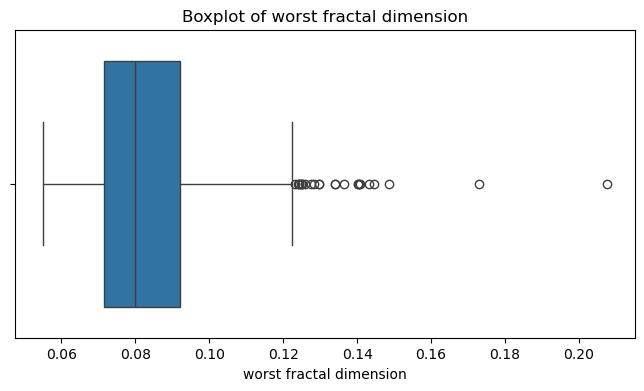

In [38]:
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

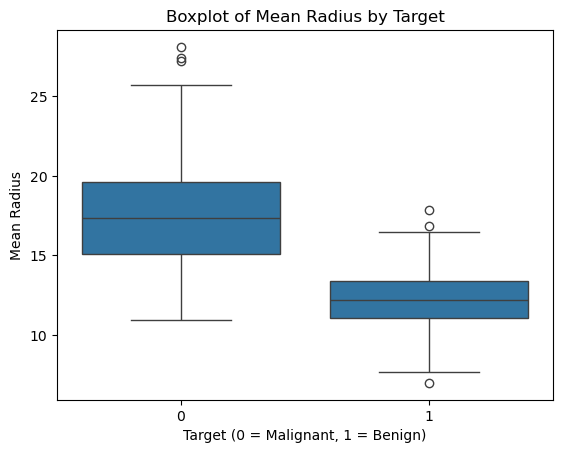

In [39]:
# Group by target (malignant vs benign)
df['target'] = data.target
sns.boxplot(x=df['target'], y=df['mean radius'])
plt.title("Boxplot of Mean Radius by Target")
plt.xlabel("Target (0 = Malignant, 1 = Benign)")
plt.ylabel("Mean Radius")
plt.show()

In [42]:
# Loop through all numerical columns and print the outlier bounds
for column in df.columns:  
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{column}: Outliers below {lower_bound} or above {upper_bound}")


mean radius: Outliers below 5.579999999999999 or above 21.9
mean texture: Outliers below 7.725000000000003 or above 30.244999999999997
mean perimeter: Outliers below 31.775000000000013 or above 147.49499999999998
mean area: Outliers below -123.30000000000001 or above 1326.3000000000002
mean smoothness: Outliers below 0.057975 or above 0.133695
mean compactness: Outliers below -0.03329999999999997 or above 0.22861999999999996
mean concavity: Outliers below -0.12215000000000001 or above 0.28241000000000005
mean concave points: Outliers below -0.060224999999999994 or above 0.15453499999999998
mean symmetry: Outliers below 0.11119999999999995 or above 0.24640000000000006
mean fractal dimension: Outliers below 0.045070000000000006 or above 0.07874999999999999
radius error: Outliers below -0.13735000000000003 or above 0.84865
texture error: Outliers below -0.12625000000000008 or above 2.43415
perimeter error: Outliers below -1.0205 or above 5.9835
area error: Outliers below -23.1599999999999

In [44]:
df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df_cleaned.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


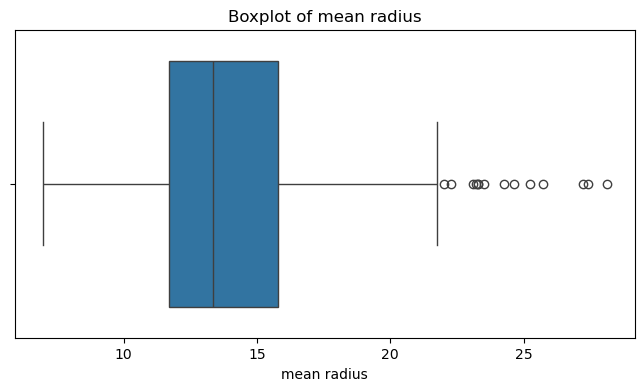

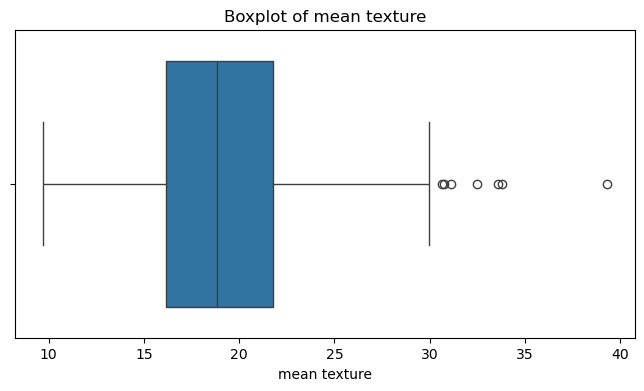

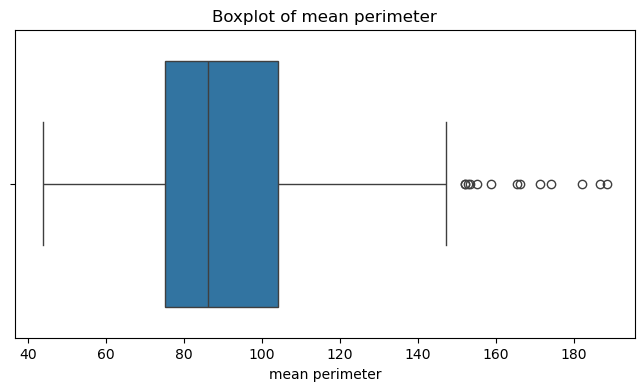

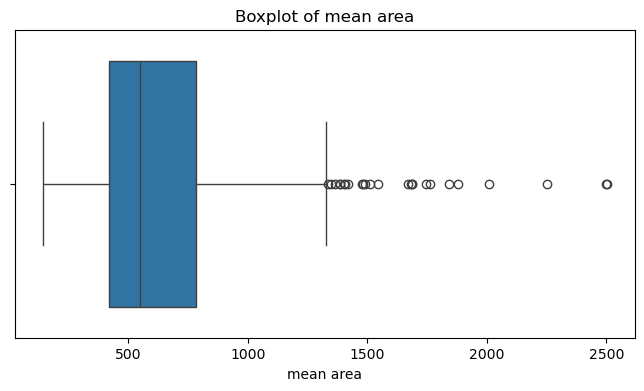

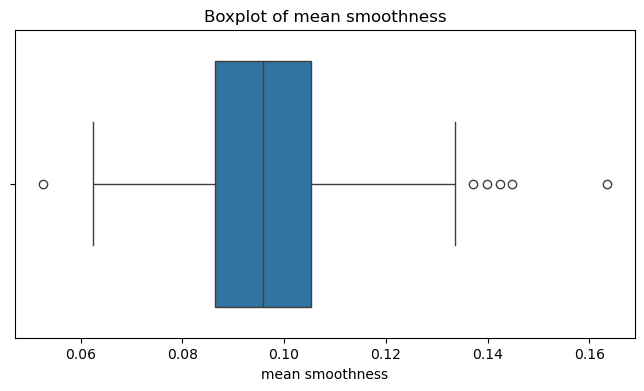

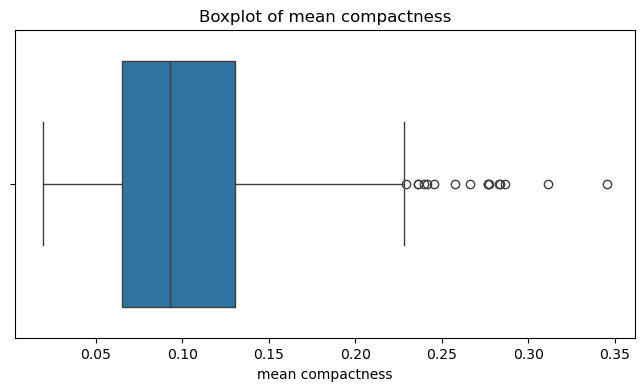

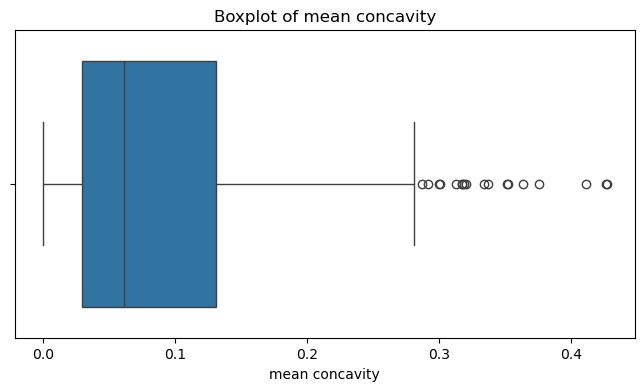

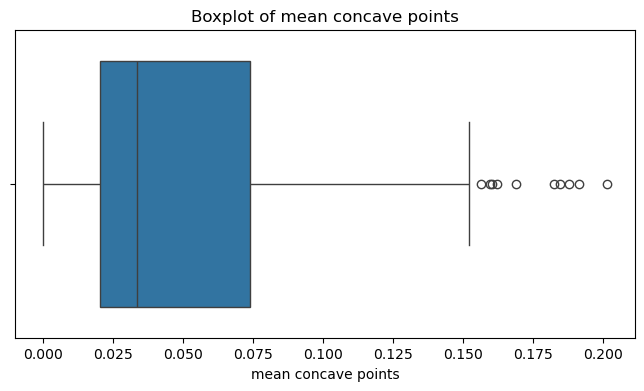

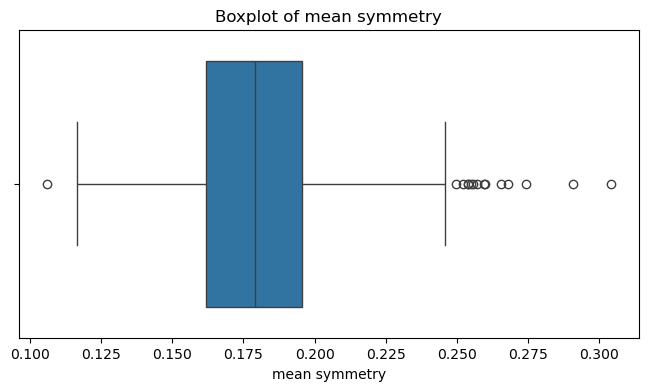

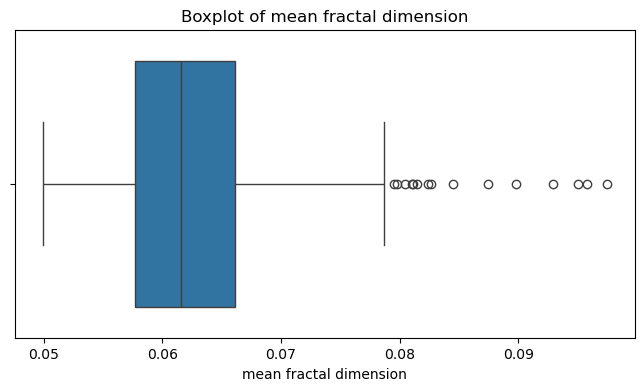

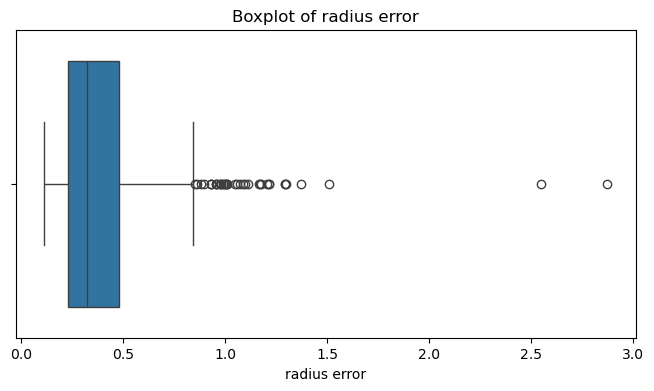

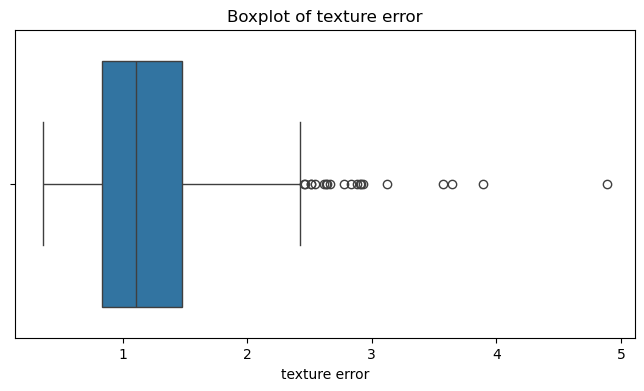

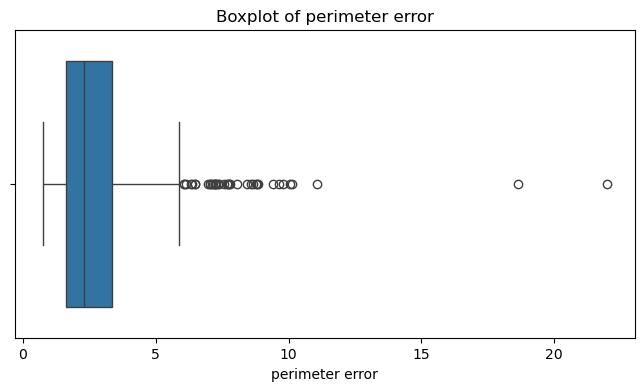

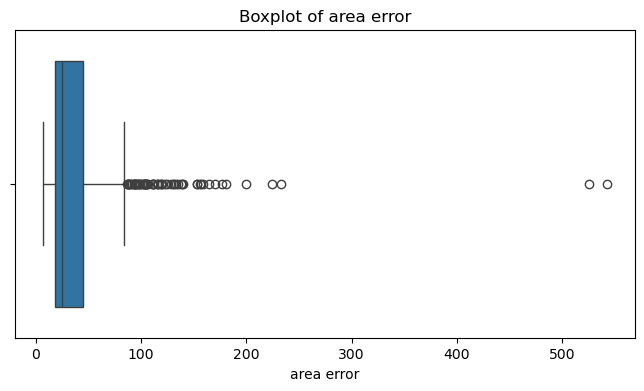

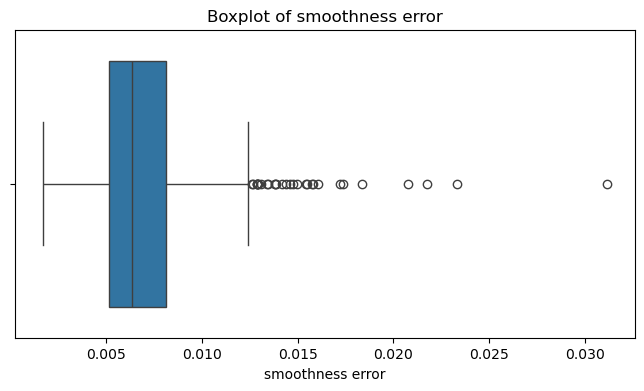

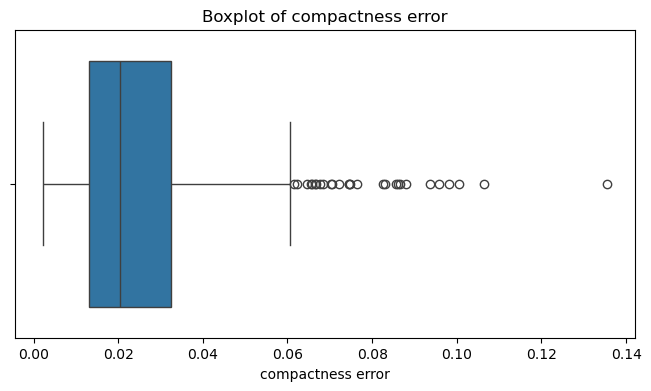

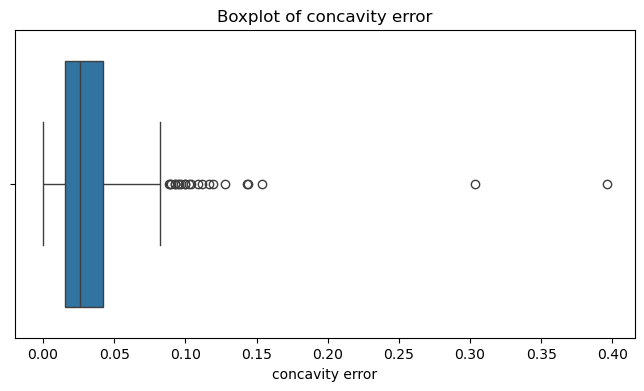

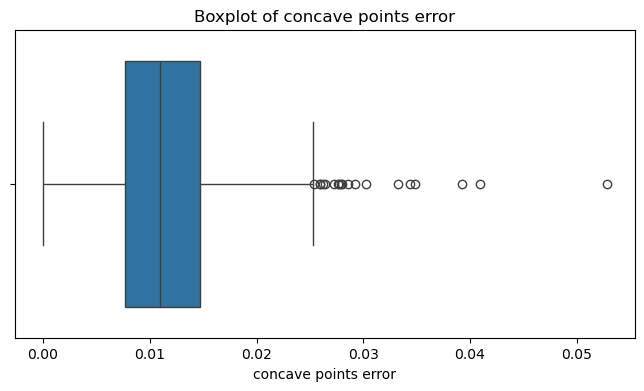

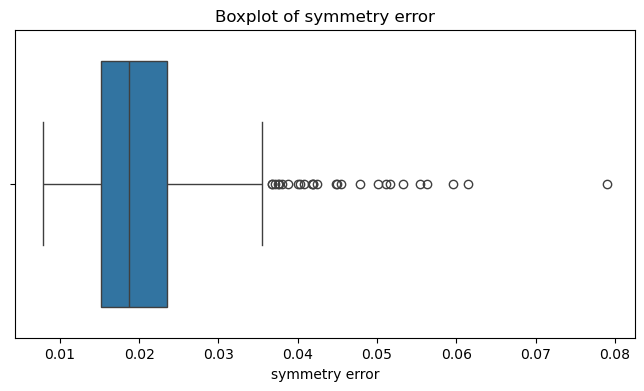

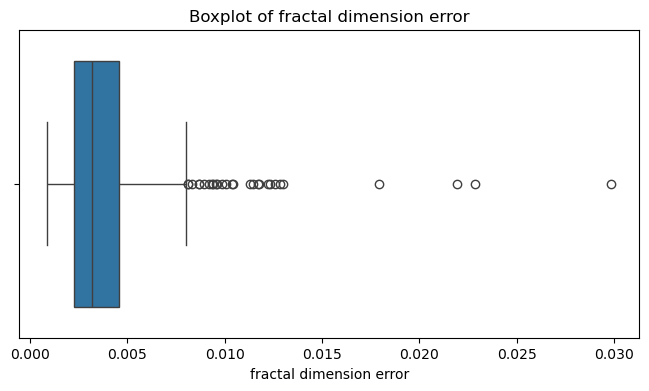

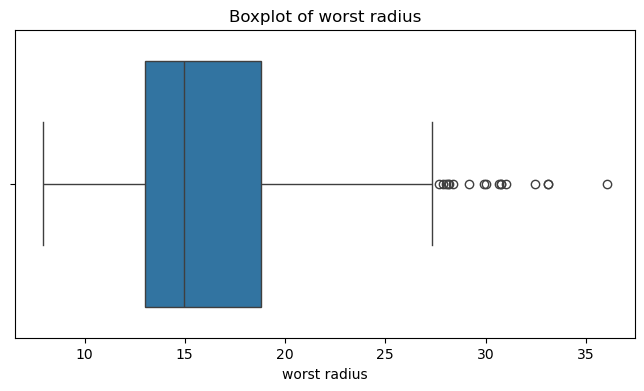

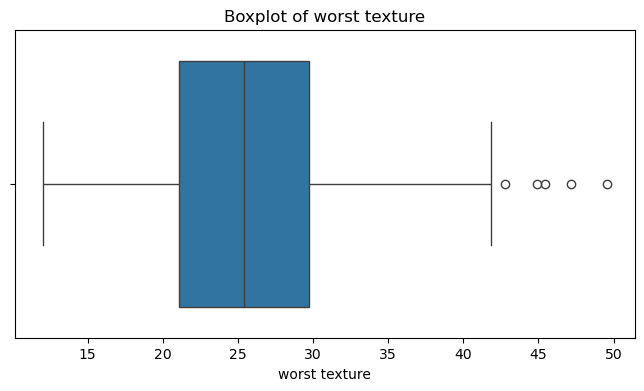

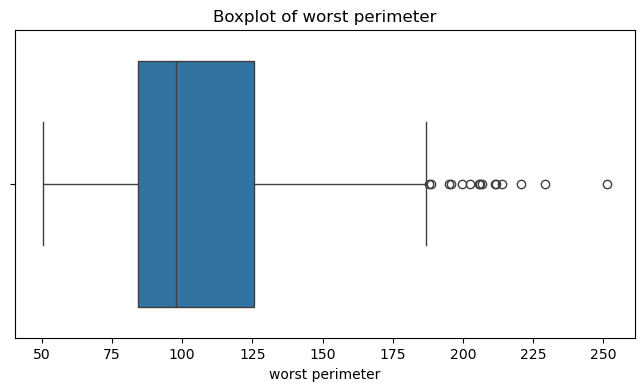

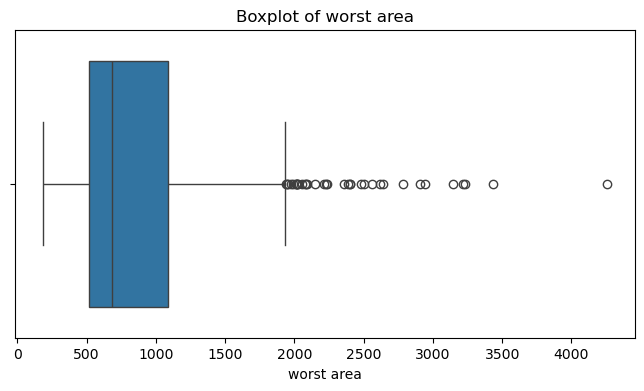

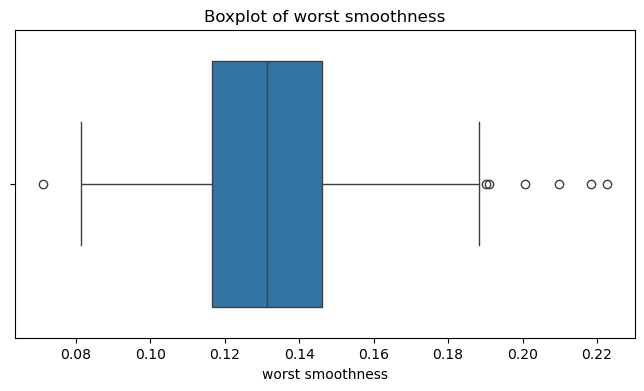

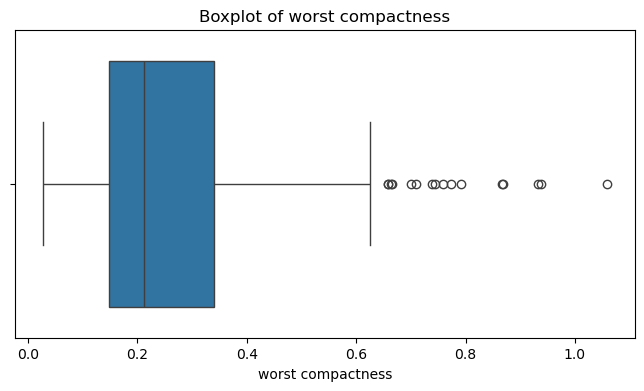

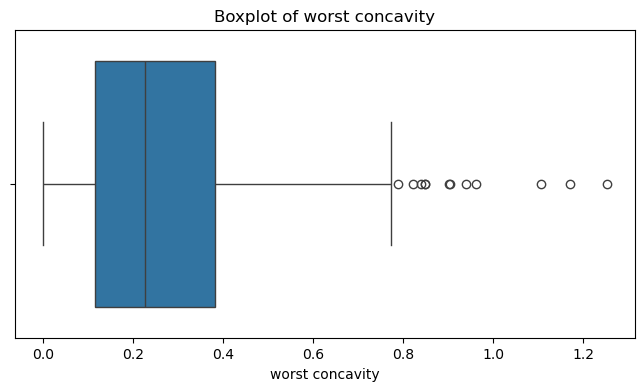

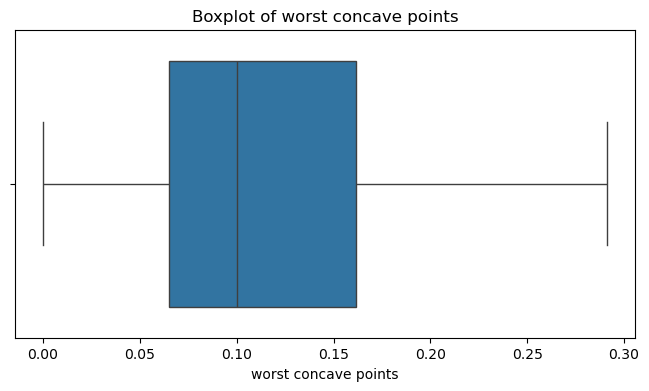

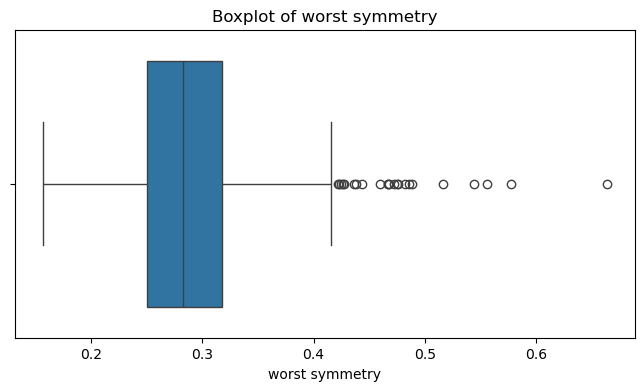

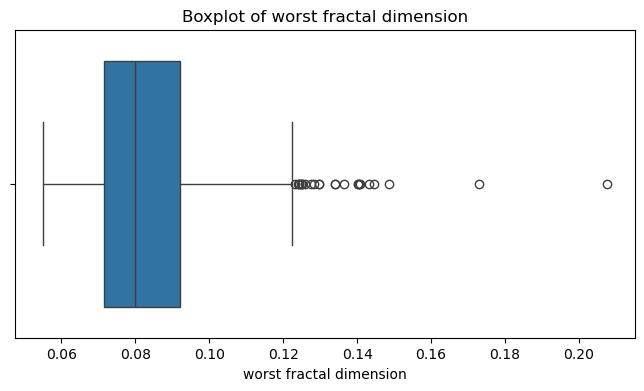

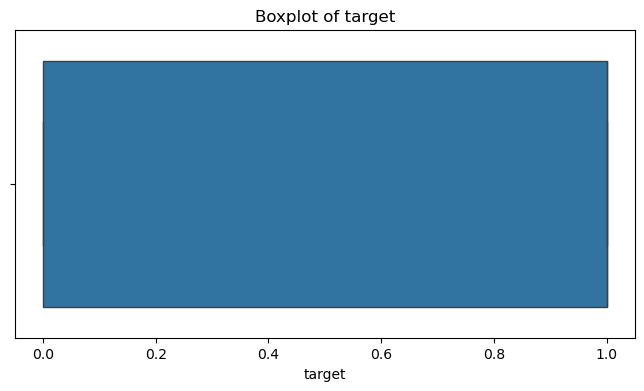

In [46]:
for column in df_cleaned.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_cleaned[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

### Modeling

In [48]:
x = df_cleaned
y = df_cleaned.target

In [50]:
std = StandardScaler()
x_scaled = std.fit_transform(x)

In [52]:
x_scaled_df = pd.DataFrame(x_scaled, columns=df_cleaned.columns)
x_scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,-1.297676
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,-1.297676
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,-1.297676
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,-1.297676
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,-1.297676


In [54]:
le = LabelEncoder()
y_le = le.fit_transform(y)
y_df = pd.DataFrame(y_le, columns=['target'])
y_df.head()

,target
0,0
1,0
2,0
3,0
4,0


In [56]:
final_df = pd.concat([x_scaled_df, y_df], axis=1)
final_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,-1.297676,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,-1.297676,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,-1.297676,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,-1.297676,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,-1.297676,0


## Classification Algorithm Implementation

The following classification algorithms were implemented and evaluated:

1. **Logistic Regression:**
   - Logistic Regression is a linear model used for binary classification. It estimates the probability of a sample belonging to a class using a sigmoid function.
   - It is suitable for this dataset because it works well when the features are linearly separable.

In [59]:
x = df_cleaned.drop(columns=['target'])
y = df_cleaned['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [175]:
x_train_scaled = std.fit_transform(x_train)
x_test_scaled = std.transform(x_test)

In [65]:
sk = SelectKBest(score_func=mutual_info_classif, k=10)
x_train_selected = sk.fit_transform(x_train_scaled, y_train)
x_test_selected = sk.transform(x_test_scaled)

In [67]:
model_1 = LogisticRegression()
model_1.fit(x_train_scaled,y_train)

LogisticRegression()

In [69]:
y_pred = model_1.predict(x_test_scaled)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [71]:
acc_1 = accuracy_score(y_test,y_pred)
acc_1

0.9736842105263158

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [75]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[41  2]
 [ 1 70]]


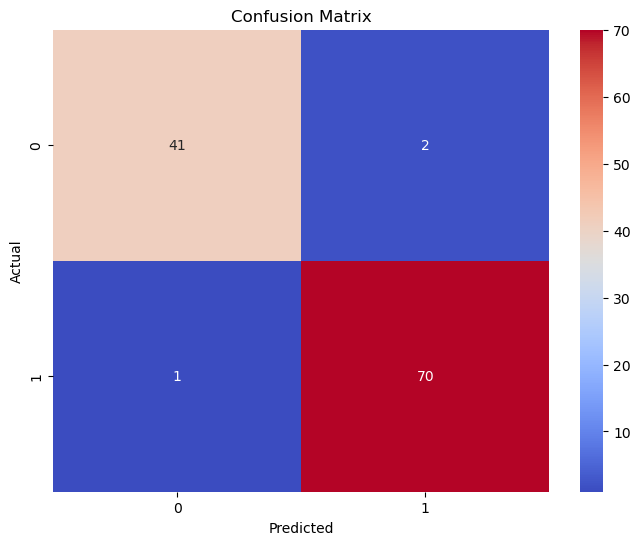

In [77]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

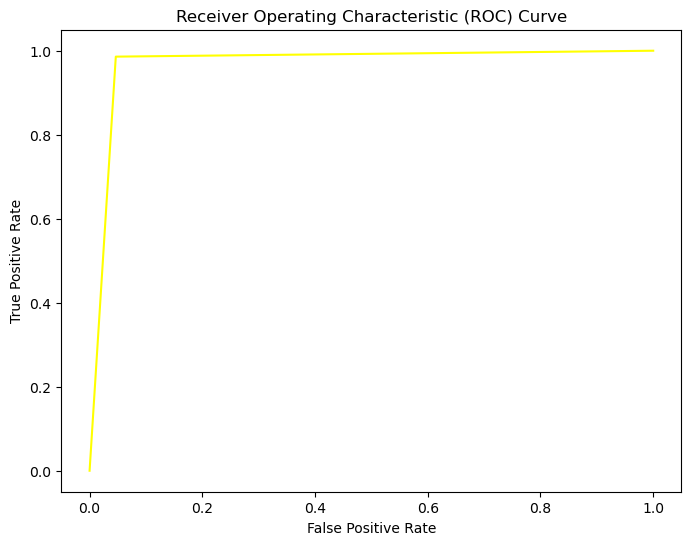

In [208]:
fpr,tpr,_ = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='yellow', label="ROC Curve")  
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.show()

2. **Decision Tree Classifier:**
   - Decision Trees split the data into subsets based on feature thresholds, forming a tree structure to make predictions.
   - They are easy to interpret but can overfit on small datasets or noisy data.

In [79]:
model_2 = DecisionTreeClassifier(random_state = 42,max_depth = 10)
model_2.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [81]:
y_pred_2 = model_2.predict(x_test_scaled)
y_pred_2

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [83]:
acc_dt = accuracy_score(y_test,y_pred_2)
acc_dt

0.9473684210526315

In [85]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [87]:
cm_2 = confusion_matrix(y_test,y_pred_2)
print(cm_2)

[[40  3]
 [ 3 68]]


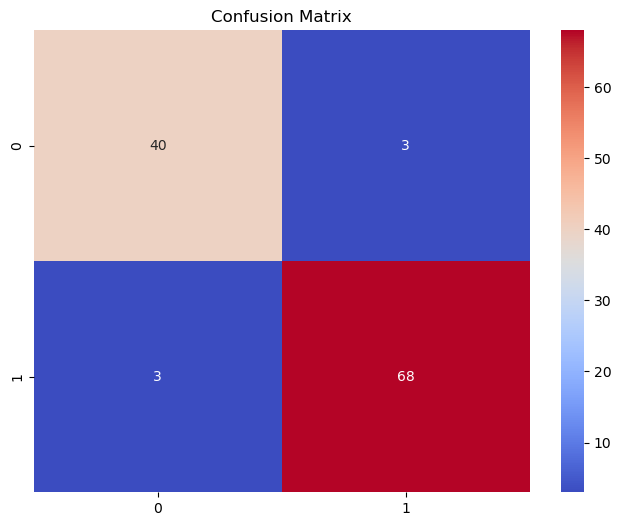

In [89]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

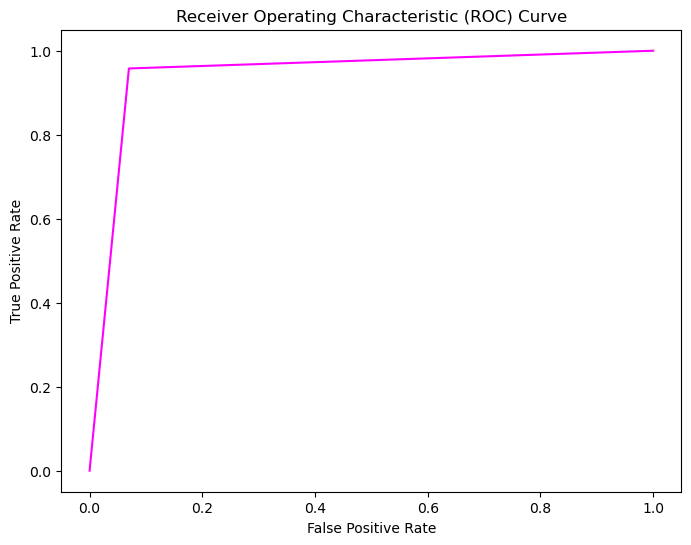

In [206]:
fpr,tpr,_ = roc_curve(y_test,y_pred_2)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='magenta', label="ROC Curve")  
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.show()

3. **Support Vector Machine (SVM):**
   - SVM finds the optimal hyperplane that maximizes the margin between classes in a high-dimensional space.
   - SVM performs well on this dataset due to its effectiveness in handling linearly separable data after scaling.

In [91]:
model_3 = SVC(probability=True)
model_3.fit(x_train_scaled,y_train)

SVC(probability=True)

In [93]:
y_pred_svc = model_3.predict(x_test_scaled)
acc_svc = accuracy_score(y_test,y_pred_svc)
acc_svc

0.9824561403508771

In [95]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [97]:
print("\nConfusion Matrix:")
cm_svc=confusion_matrix(y_test, y_pred_svc)
print(cm_svc)


Confusion Matrix:
[[41  2]
 [ 0 71]]


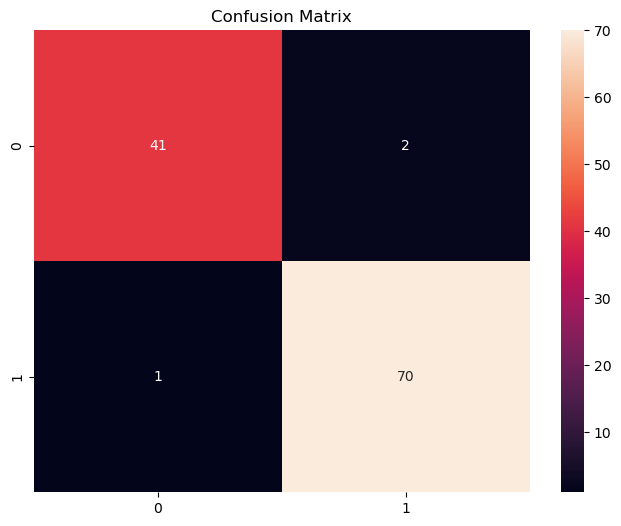

In [99]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.show()

In [101]:
fpr,tpr,_ = roc_curve(y_test,y_pred_svc)
roc_auc = auc(fpr,tpr)

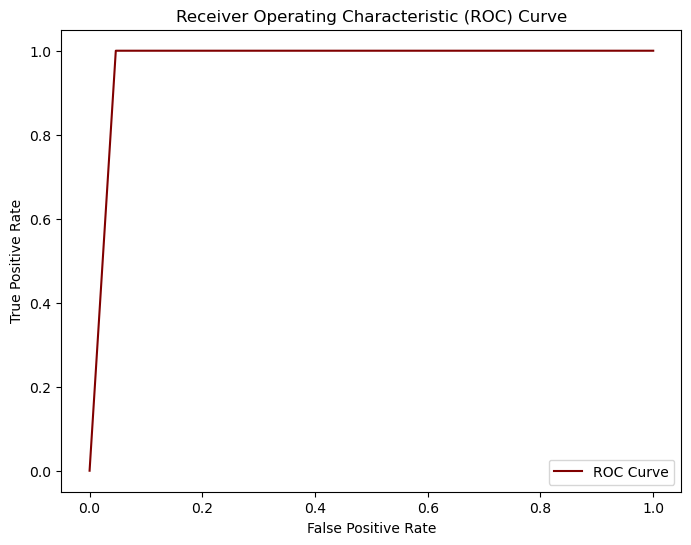

In [103]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='maroon', label="ROC Curve")  
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")  
plt.show()

4. **k-Nearest Neighbors (k-NN):**
   - k-NN predicts the class of a sample based on the majority class of its k nearest neighbors in feature space.
   - It is sensitive to feature scaling and may not perform well with high-dimensional data or noise.

In [105]:
model_4 = KNeighborsClassifier(n_neighbors = 5)
model_4.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [107]:
yp_knn = model_4.predict(x_test_scaled)

In [109]:
acc_knn = accuracy_score(y_test,yp_knn)
acc_knn

0.9473684210526315

In [111]:
print(classification_report(y_test, yp_knn))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [113]:
print("\nConfusion Matrix:")
cm_knn=confusion_matrix(y_test, yp_knn)
print(cm_knn)


Confusion Matrix:
[[40  3]
 [ 3 68]]


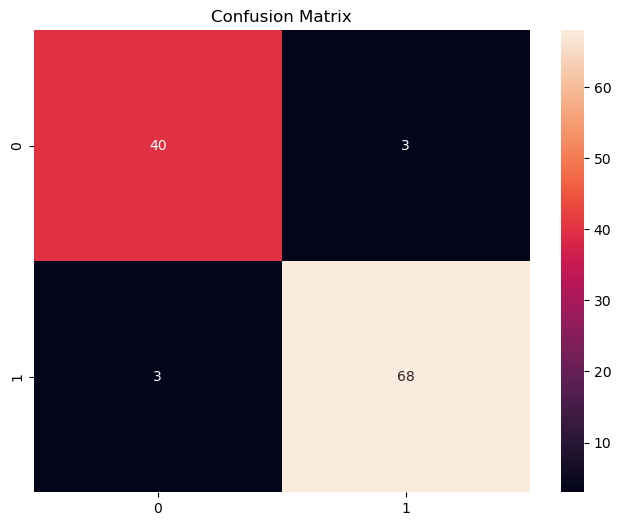

In [115]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True)
plt.title('Confusion Matrix')
plt.show()

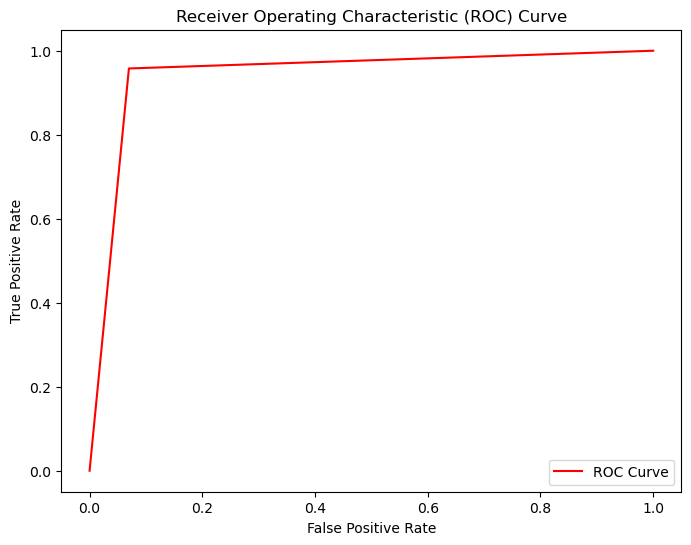

In [204]:
fpr,tpr,_ = roc_curve(y_test,yp_knn)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='red', label="ROC Curve")  
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")  
plt.show()

5. **Gaussian Naive Bayes:**
   - Naive Bayes assumes conditional independence between features and uses Bayes’ theorem for classification.
   - It is suitable for this dataset because it handles continuous data well with its Gaussian distribution assumption.

In [117]:
model_5 = GaussianNB()
model_5.fit(x_train_scaled,y_train)

GaussianNB()

In [119]:
y_pred_nb = model_5.predict(x_test_scaled)

In [121]:
acc_nb = accuracy_score(y_test,y_pred_nb)
acc_nb

0.9649122807017544

In [123]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [125]:
print("\nConfusion Matrix:")
cm_nb=confusion_matrix(y_test, y_pred_nb)
print(cm_nb)


Confusion Matrix:
[[40  3]
 [ 1 70]]


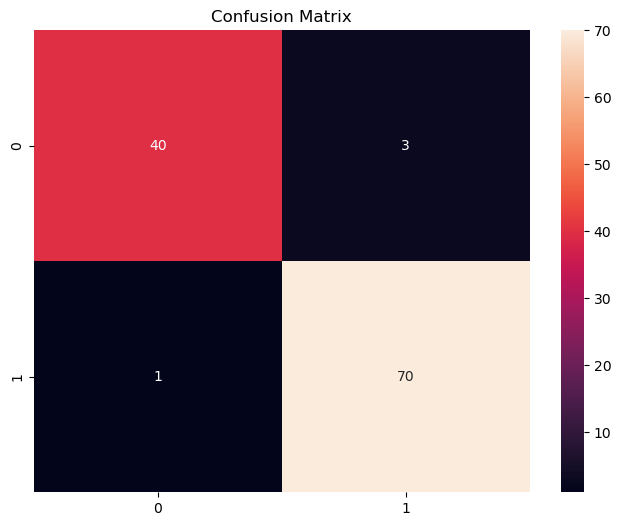

In [127]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True)
plt.title('Confusion Matrix')
plt.show()

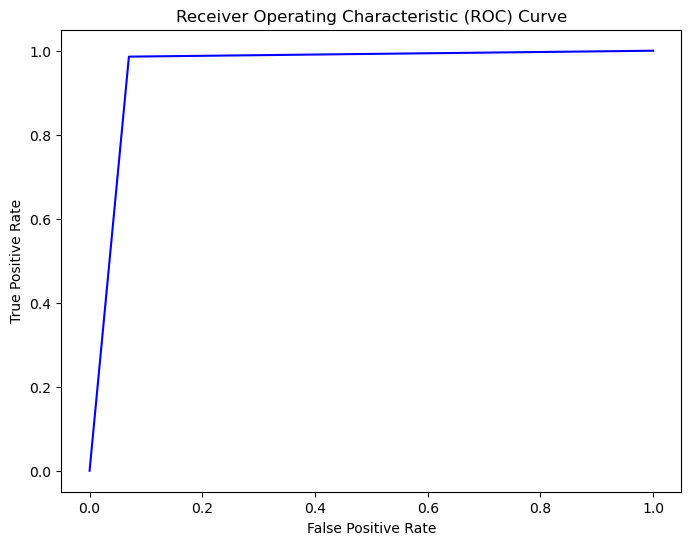

In [202]:
fpr,tpr,_ = roc_curve(y_test,y_pred_nb)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label="ROC Curve")  
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.show()

6. **Random Forest Classifier:**
   - Random Forest is an ensemble method that combines multiple decision trees. It reduces overfitting and increases accuracy by averaging predictions from multiple trees.
   - This makes it robust and suitable for datasets with complex patterns.

In [129]:
rf_model = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42)

In [131]:
rf_model.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [133]:
y_pred_rf = rf_model.predict(x_test_scaled)

In [135]:
acc_rf = accuracy_score(y_test,y_pred_rf)
acc_rf

0.9649122807017544

In [137]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [182]:
cm_rf=confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[40  3]
 [ 1 70]]


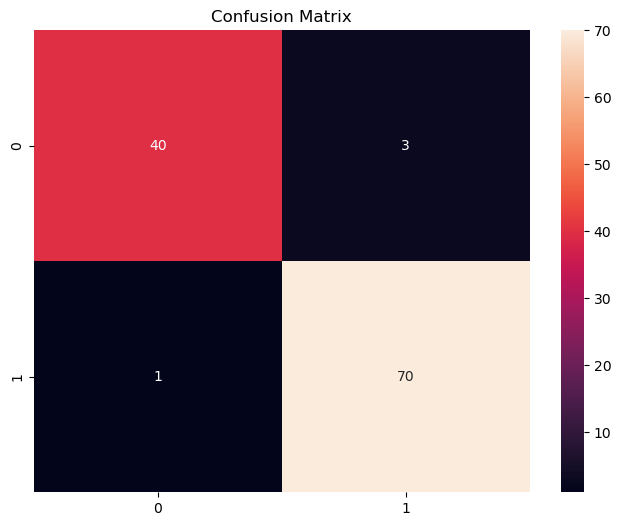

In [184]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True)
plt.title('Confusion Matrix')
plt.show()

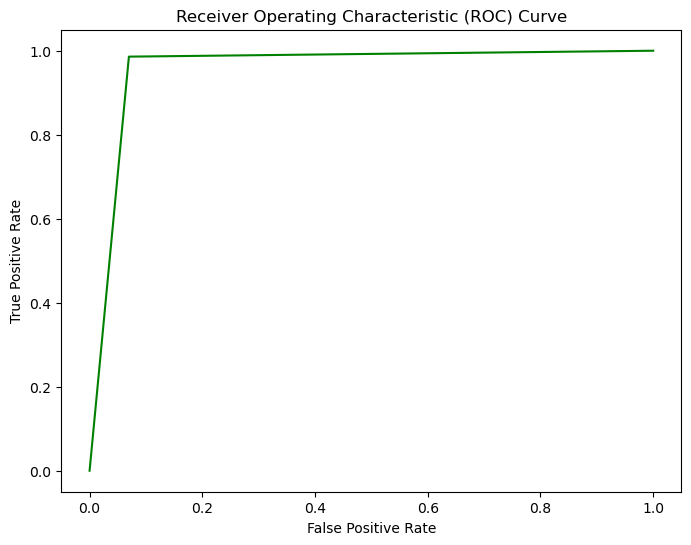

In [198]:
fpr,tpr,_ = roc_curve(y_test,y_pred_rf)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='green', label="ROC Curve")  
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.show()

7. **Gradient Boosting:**
   - Gradient Boosting builds an ensemble of weak learners (typically decision trees) by minimizing errors iteratively.
   - It performs well on datasets with complex patterns but is computationally intensive.

In [141]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [143]:
gb_model.fit(x_train_scaled,y_train)

GradientBoostingClassifier(random_state=42)

In [145]:
y_pred_gb = gb_model.predict(x_test_scaled)

In [147]:
acc_gb = accuracy_score(y_test,y_pred_gb)
acc_gb

0.956140350877193

In [149]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [186]:
cm_gb=confusion_matrix(y_test, y_pred_gb)
print(cm_gb)

[[40  3]
 [ 2 69]]


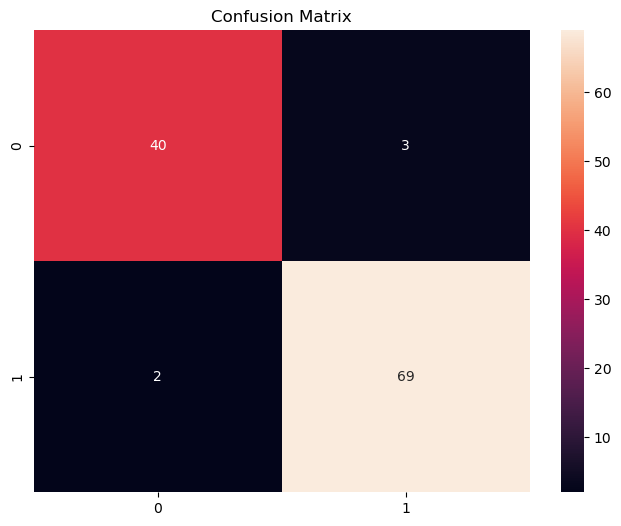

In [188]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True)
plt.title('Confusion Matrix')
plt.show()

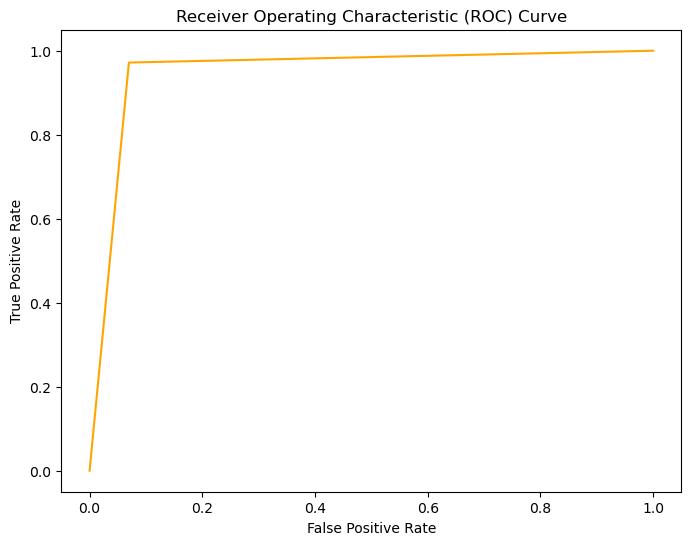

In [200]:
fpr,tpr,_ = roc_curve(y_test,y_pred_gb)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='orange', label="ROC Curve")  
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.show()

## Model Comparison

In [155]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "SVM", "k-NN","Guassian NB","Random Forest","Gradient Boosting"],
    "Accuracy": [acc_1,acc_dt,acc_svc,acc_knn,acc_nb,acc_rf,acc_gb]})

In [159]:
results = results.sort_values(by="Accuracy", ascending=False)
results

,Model,Accuracy
2,SVM,0.982456
0,Logistic Regression,0.973684
4,Guassian NB,0.964912
5,Random Forest,0.964912
6,Gradient Boosting,0.956140
1,Decision Tree,0.947368
3,k-NN,0.947368


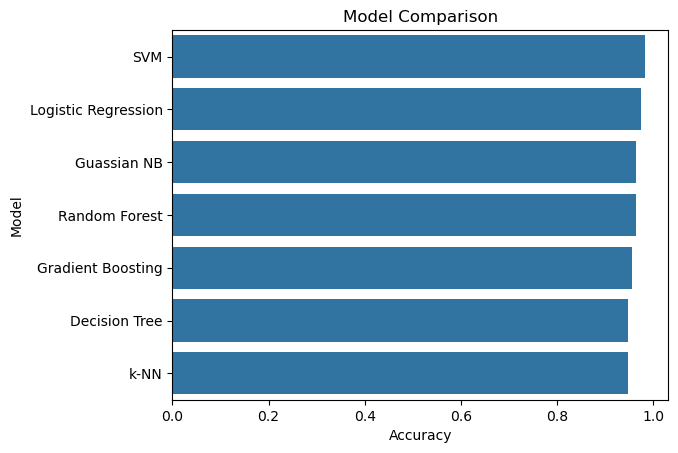

In [163]:
sns.barplot(x="Accuracy", y="Model", data=results)
plt.title("Model Comparison")
plt.show()

## Results and Insights

#### Key Observations:
1. **Best-Performing Model:**
   - The Support Vector Machine (SVM) achieved the highest accuracy (98.25%), indicating that the dataset is linearly separable after scaling.

2. **Tree-Based Models:**
   - Random Forest and Gradient Boosting performed similarly (96.49% and 95.61%, respectively), showcasing the robustness of ensemble methods.

3. **Lowest Accuracy:**
   - The Decision Tree and k-NN models had the lowest accuracy (94.73%). This is likely due to overfitting (Decision Tree) and sensitivity to noise and scaling (k-NN).

4. **Importance of Preprocessing:**
   - Feature scaling significantly improved the performance of algorithms like SVM and k-NN.


## Conclusion:
- SVM is recommended for this dataset due to its high accuracy and suitability for binary classification.
- Tree-based methods like Random Forest and Gradient Boosting are good alternatives if interpretability or robustness is prioritized.
- Logistic Regression also performed well, making it a simpler yet effective choice for this dataset.
